# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/camille_vaccination/"

## Choisir une décennie

In [4]:
DECADE = '1890'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB421_1899-03-20_01-00002.txt',
 'KB_JB421_1899-05-27_01-00003.txt',
 'KB_JB421_1899-06-01_01-00003.txt',
 'KB_JB421_1899-11-30_01-00002.txt',
 'KB_JB421_1899-12-11_01-00002.txt']

In [7]:
texts = [open(data_path + f,encoding='utf-8').read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

"«wc-ri c^-g^;iÉWijMl|jj| dante moisson de bénédictions et de grâces. Gloire à Dieu qui s'est montré grand dans son œuvre. Discipulus. Le crime de Lille. Une lettre du Frère Flamidien à ses parents. Le Prèro Flamidien a écrit à ses parents une lettre pour les consoler. Nous extrayons de cette lettre, dout la lecture produit une impression favorable, les passages suivants : « Je le répète, quel honn"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [12]:
# Détail de la matrice
tfidf_vectors.shape
#rajout de .shape pendant l'explication, pour que ce soit plus clair

(743, 4044)

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

division       0.201819
crime          0.196691
parents        0.172638
août           0.162643
l'enfant       0.143830
                 ...   
dépendances    0.000000
dépense        0.000000
dépenses       0.000000
dépositaire    0.000000
■■             0.000000
Length: 4044, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [14]:
tfidf_array = tfidf_vectors.toarray()

In [15]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
cosine(tfidf_array[0], tfidf_array[1])

0.8188780567033955

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [18]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [19]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [20]:
clusters = km_model.fit_predict(tfidf_vectors)

In [21]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [22]:
pprint(dict(clustering))

{0: ['KB_JB555_1892-10-25_01-00003.txt',
     'KB_JB555_1894-10-15_01-00004.txt',
     'KB_JB555_1895-04-04_01-00003.txt',
     'KB_JB555_1895-10-10_01-00003.txt',
     'KB_JB555_1895-10-13_01-00004.txt',
     'KB_JB555_1896-03-14_01-00003.txt',
     'KB_JB555_1896-04-10_01-00003.txt',
     'KB_JB555_1896-06-26_01-00003.txt',
     'KB_JB555_1897-09-19_01-00003.txt',
     'KB_JB555_1898-03-11_01-00003.txt',
     'KB_JB567_1890-05-09_01-00003.txt',
     'KB_JB567_1891-07-28_01-00003.txt',
     'KB_JB567_1892-02-05_01-00003.txt',
     'KB_JB567_1894-10-25_01-00003.txt',
     'KB_JB567_1896-10-21_01-00003.txt',
     'KB_JB567_1897-04-13_01-00003.txt',
     'KB_JB567_1899-07-06_01-00003.txt',
     'KB_JB638_1890-06-16_01-00003.txt',
     'KB_JB638_1890-07-12_01-00003.txt',
     'KB_JB638_1892-02-05_01-00003.txt',
     'KB_JB638_1892-02-23_01-00003.txt',
     'KB_JB638_1892-03-01_01-00003.txt',
     'KB_JB638_1892-03-15_01-00003.txt',
     'KB_JB638_1892-04-05_01-00003.txt',
     'KB_JB638_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [23]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [24]:
reduced_vectors[:10]

array([[-0.24380556, -0.04208185],
       [-0.25723113, -0.03728525],
       [-0.26748512, -0.08643661],
       [-0.24221068, -0.06613614],
       [-0.2191543 , -0.07712128],
       [-0.2867771 , -0.03594732],
       [-0.31321041, -0.08136652],
       [-0.33332155, -0.06074229],
       [-0.31805747, -0.07481355],
       [-0.31654628, -0.07682835]])

### Générer le plot

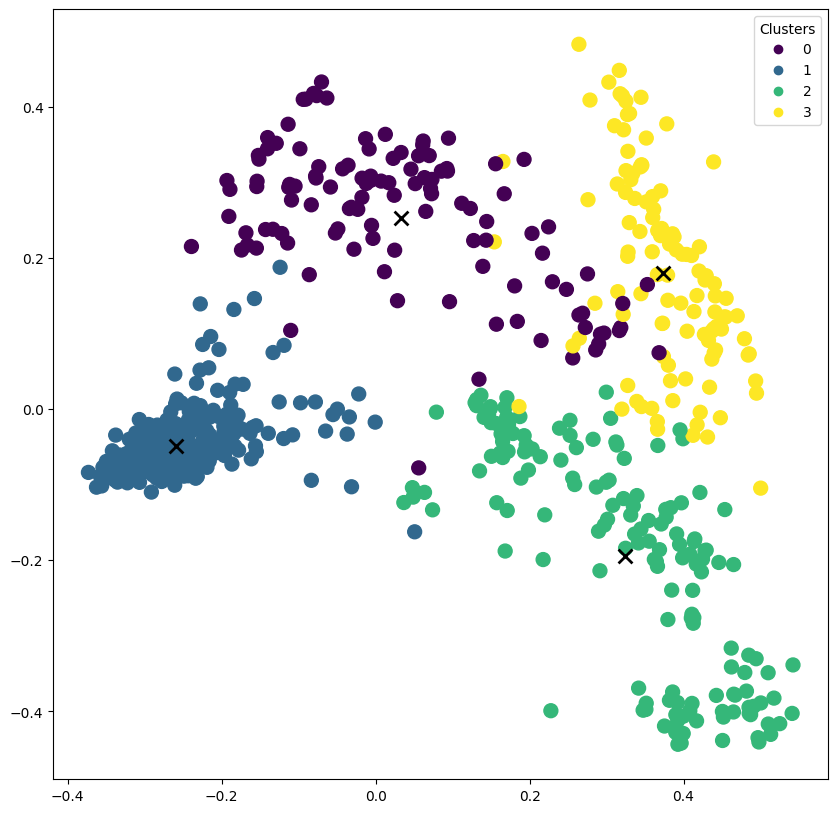

In [25]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")